# Titanic (1912)

The dataset is contains the information about the passengers on Titanic Ship.
Based on the information we have to predict if the certain person(passenger) have survived or not.
Therefore, classification model applies for prediction by machine learning

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv file
dt = pd.read_csv('titanic.csv')
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## A Quick Report of dataset 

In [3]:
from pandas_profiling import ProfileReport

In [4]:
profile = ProfileReport(dt, explorative = True)

In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Begin with EDA

In [3]:
#no. of colums and rows
dt.shape

(891, 12)

In [4]:
#check for non-null values of each column and their datatypes
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#any missing values?
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

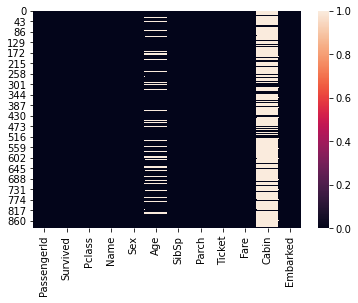

In [6]:
sns.heatmap(dt.isnull())

In [7]:
print('Unique Values in gender:\n', dt['Sex'].unique())
print('Unique Values in pclass:\n', dt['Pclass'].unique())
print('Unique Values in sibsp:\n', dt['SibSp'].unique())
print('Unique Values in age:\n', dt['Age'].unique())
print('Unique Values in parch:\n', dt['Parch'].unique())
print('Unique Values in embarked\n:', dt['Embarked'].unique())

Unique Values in gender:
 ['male' 'female']
Unique Values in pclass:
 [3 1 2]
Unique Values in sibsp:
 [1 0 3 4 2 5 8]
Unique Values in age:
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique Values in parch:
 [0 1 2 5 3 4 6]
Unique Values in embarked
: ['S' 'C' 'Q' nan]


### Univariate Visuals

In [8]:
dt['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

The proportion of male is higher compared to female. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

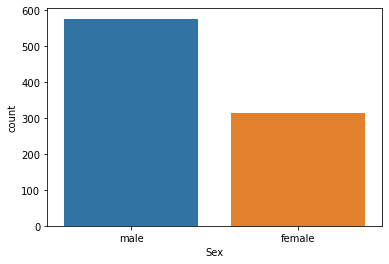

In [9]:
sns.countplot(x = 'Sex', data = dt)

In [10]:
dt['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

More than 50% of passenger belongs to Class 3, ~25% to Class 1 and rest to Class 2

<AxesSubplot:xlabel='Pclass', ylabel='count'>

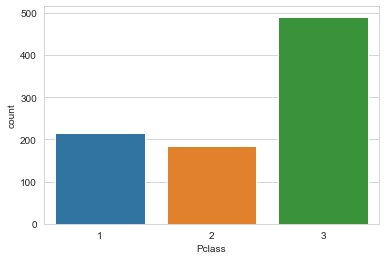

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=dt)

In [12]:
dt['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Nearly 66% passenger didn't survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

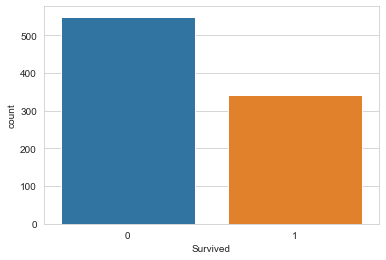

In [13]:
sns.countplot(x='Survived', data = dt)

In [14]:
dt['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

More than 65% passenger didn't have any sibling/spouse, ~20% have 1 sibling/spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

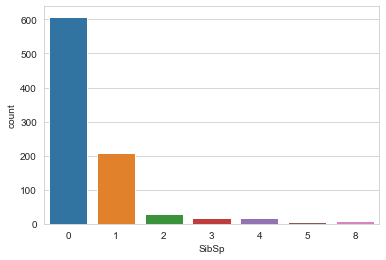

In [15]:
sns.countplot(x = 'SibSp', data=dt)

In [16]:
dt['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

~76% of the passenger does not have parent child, ~13% have 1 parent child and the rest have either 2,3,4,5 or 6 parent child

<AxesSubplot:xlabel='Parch', ylabel='count'>

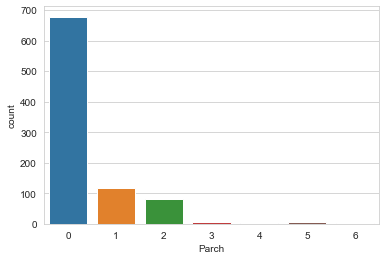

In [17]:
sns.countplot(x = 'Parch', data=dt)

In [18]:
dt['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Around 70% of passenger is embarked in ship 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

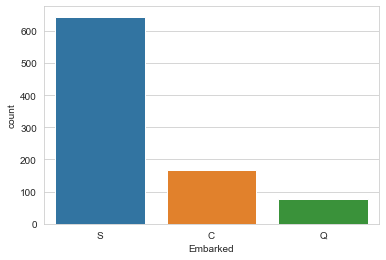

In [19]:
sns.countplot(x = 'Embarked', data=dt)

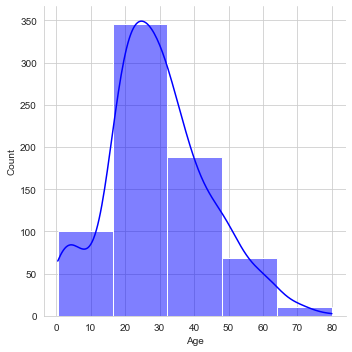

In [20]:
sns.displot(x=dt['Age'],color='blue',bins=5,kde=True)

Majority of the passengers are in the range of 20yrs-50yrs with most of them between 20-30yrs

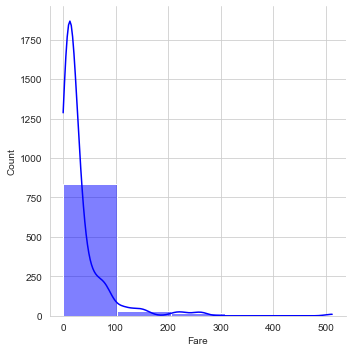

In [21]:
sns.displot(x=dt['Fare'],color='blue',bins=5,kde=True)

In [22]:
sns.distplot?

### Bivariate Analysis

In [23]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

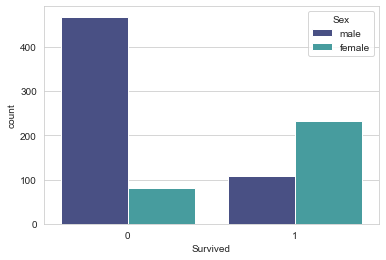

In [24]:
sns.countplot(x ='Survived', hue = 'Sex', data = dt, palette = 'mako')

More no of male died compared to female while female survival rate is higher compared to male

<AxesSubplot:xlabel='Survived', ylabel='count'>

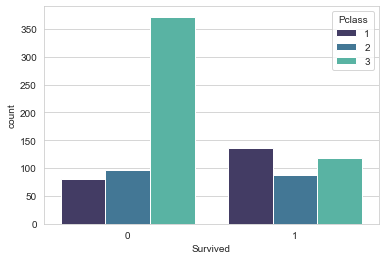

In [25]:
sns.countplot(hue = 'Pclass', x='Survived', data = dt, palette = 'mako')

<AxesSubplot:xlabel='Survived', ylabel='count'>

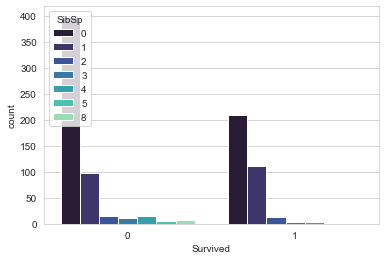

In [26]:
sns.countplot(hue = 'SibSp', x='Survived', data = dt, palette = 'mako',saturation=1.25)

In [27]:
sns.countplot?

### Multivariate Visuals

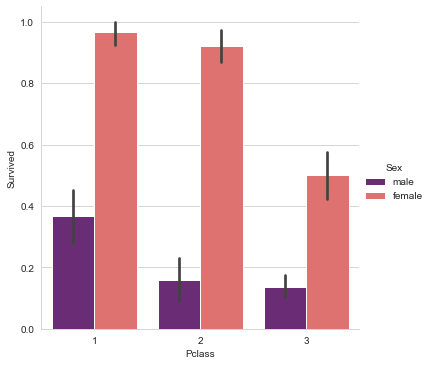

In [28]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data = dt, kind='bar',palette = 'magma')

In every class, the survival rate of female is higher than male counterparts

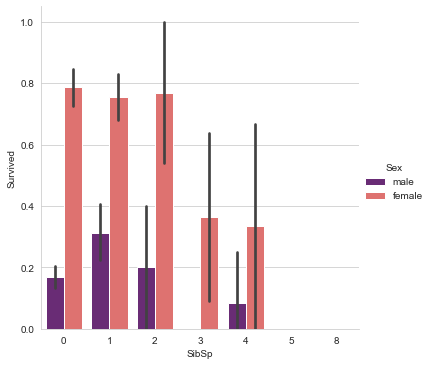

In [29]:
sns.catplot(x='SibSp',y='Survived',hue='Sex',data=dt, palette='magma',kind='bar')

In [30]:
sns.catplot?

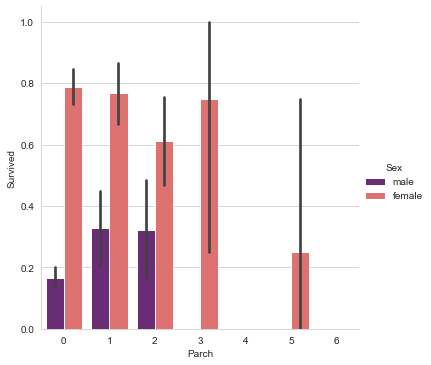

In [31]:
sns.catplot(x='Parch',y='Survived',hue='Sex',data=dt, palette='magma',kind='bar')

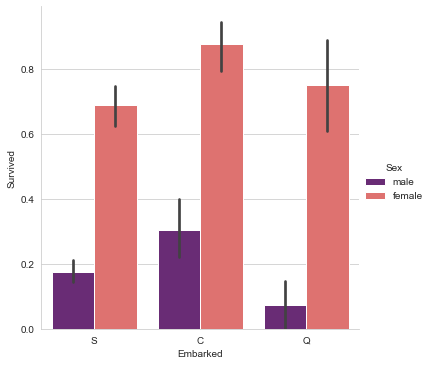

In [32]:
sns.catplot(x='Embarked',y='Survived',hue='Sex',data=dt, palette='magma',kind='bar')

#### Conclusion: Female are being given priority to be saved from sinking ship.

### All in one multivariate analysis

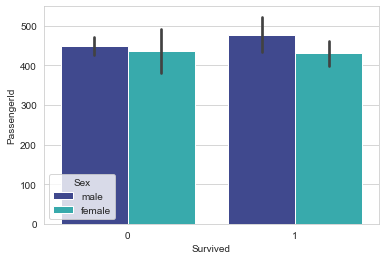

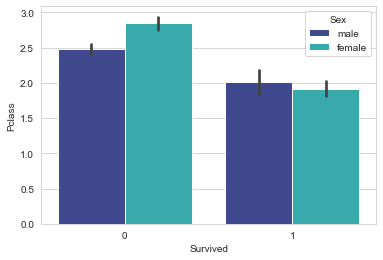

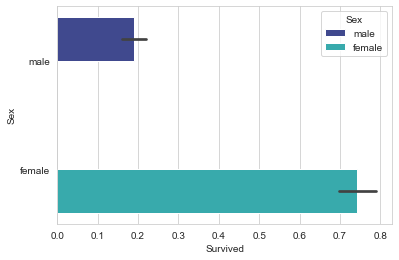

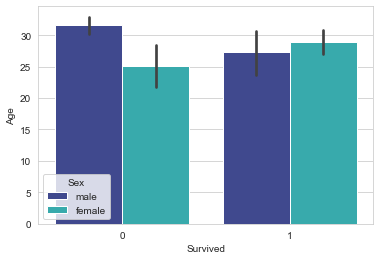

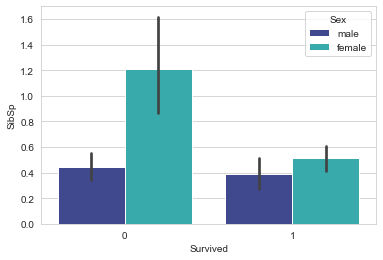

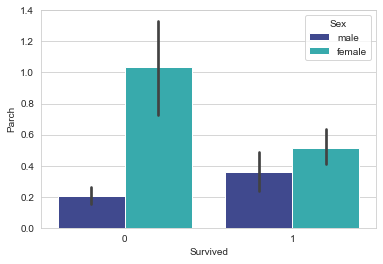

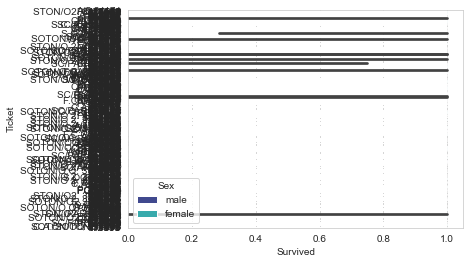

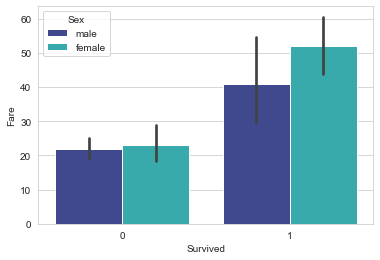

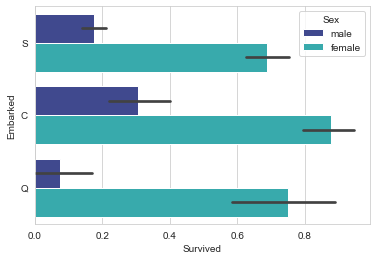

In [33]:
for i,cols in enumerate(dt.columns.drop(['Survived','Name','Cabin'])):
    plt.figure(i)
    sns.barplot(x=dt['Survived'], y=cols, data=dt, palette = 'mako',saturation=1, hue="Sex")


##### Not a conclusive visuals

## Statistics and Visuals

In [34]:
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

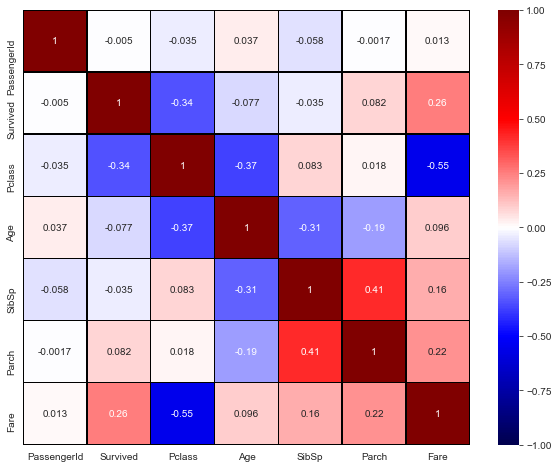

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(dt.corr(),annot=True, linecolor='black',linewidths=0.4,cmap = 'seismic',vmin=-1, vmax=1)

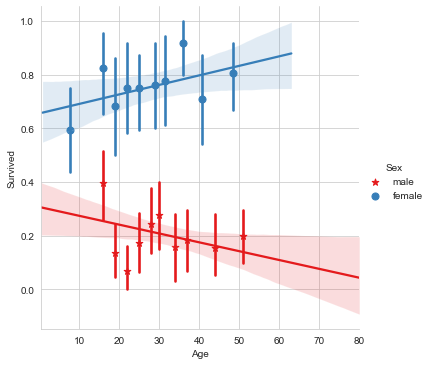

In [36]:
sns.lmplot(y='Survived', x='Age',data=dt, hue='Sex',palette='Set1',x_bins=10, markers=["*","o"])

##### Observation

Negative relation i.e as the age increases, the chances of survival in male decreases
Wheareas its opposite in case of female. Survival rate increase with the age.

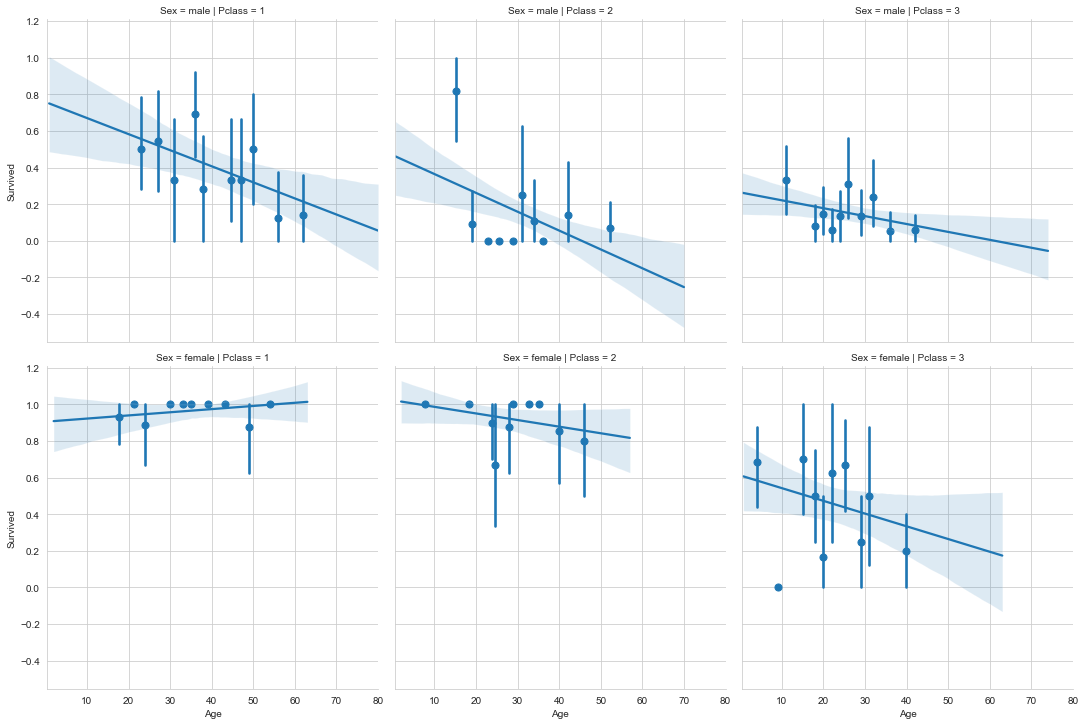

In [37]:
sns.lmplot(y='Survived', x='Age',data=dt, row='Sex', col = 'Pclass',palette='Set1',x_bins=10,height=5)

##### Observation

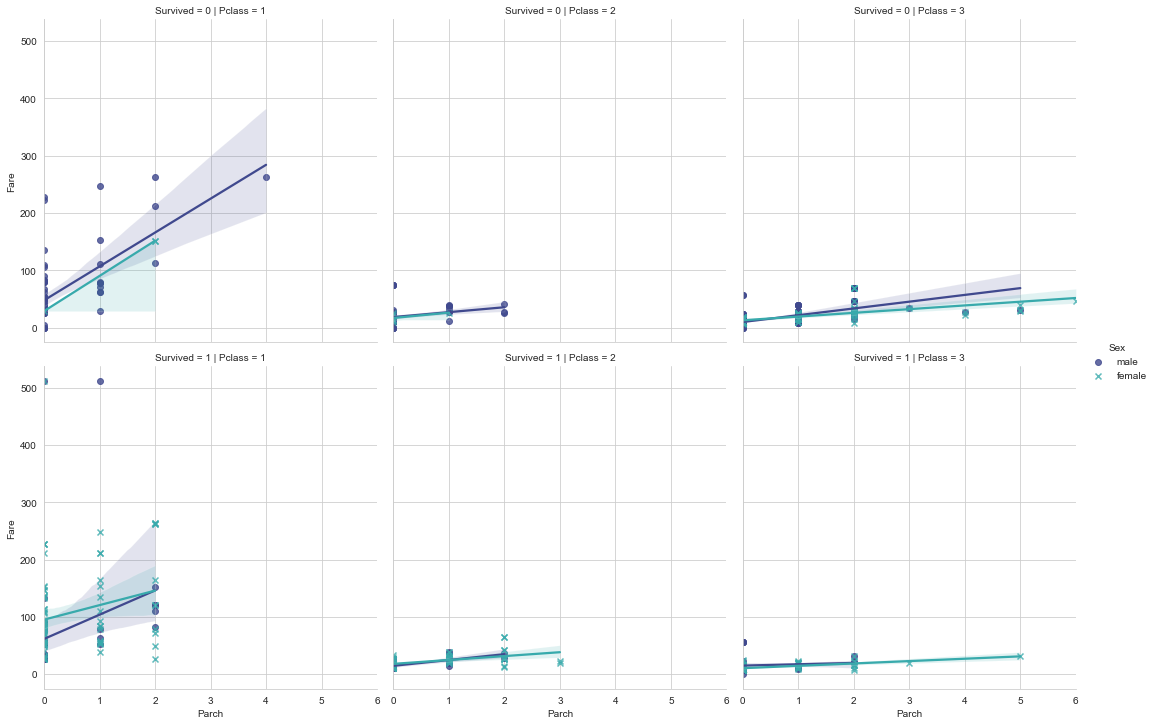

In [38]:
sns.lmplot(y='Fare', x='Parch',data=dt, row='Survived', col = 'Pclass',hue = 'Sex', palette='mako',height=5, markers = ["o","x"])


<Figure size 720x864 with 0 Axes>

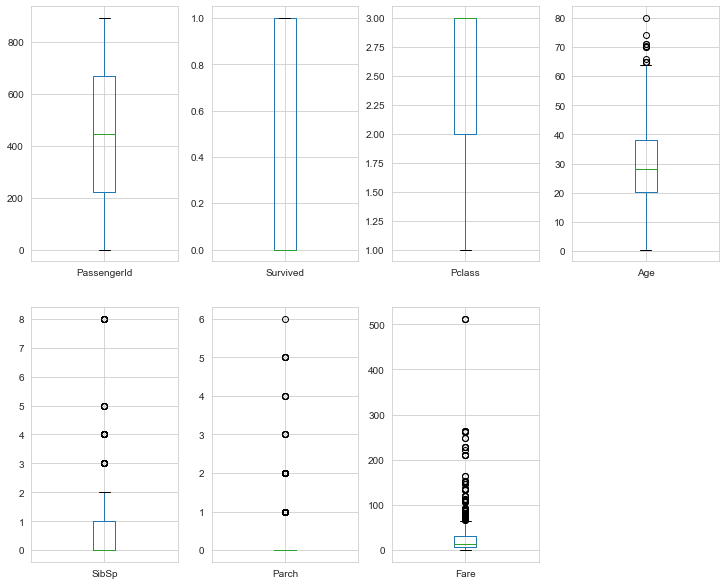

In [39]:
#checking outliers
plt.figure(figsize=(10,12))
dt.plot(kind ='box',subplots=True, layout = (3,4),figsize=(10,12))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

##### Observation

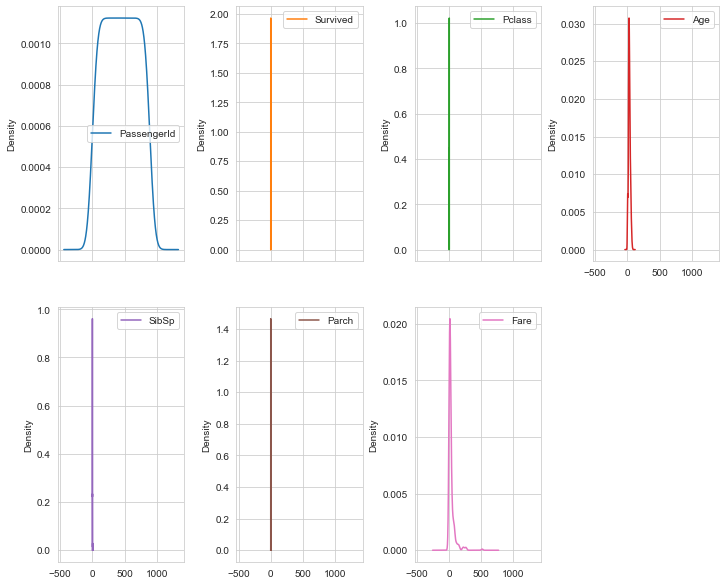

In [40]:
#Skewness
dt.plot(kind = 'kde', subplots = True, layout=(3,4), figsize = (10,12),)
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

##### Observation

## Feature Engineering

In [41]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Now, we'll try to fill the nan values in Age by the mean of that Pclass

In [42]:
def null_values(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return dt[dt['Pclass']==1]['Age'].mean()
        
        elif Pclass == 2:
            return dt[dt['Pclass']==2]['Age'].mean()
        
        elif Pclass == 3:
            return dt[dt['Pclass']==3]['Age'].mean()
        
    else:
        return Age

In [43]:
dt['Age']=dt[['Age','Pclass']].apply(null_values, axis=1)

In [44]:
#check the null values in 'Age'
dt['Age'].isnull().sum()

0

In [45]:
#Check the nan values in 'Cabin'
dt['Cabin'].isnull().sum()

687

In [46]:
#since most of the values are null, we'll drop the column
dt.drop('Cabin',axis=1, inplace=True)

In [47]:
#checking if the 'Cabin' attribute is dropped?
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [48]:
#filling the nan values in 'Embarked' with most frequent values
dt = dt.fillna(dt['Embarked'].value_counts().index[0])

In [49]:
#checking if theres any null value in 'Embarked'
dt['Embarked'].isnull().sum()

0

In [50]:
dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### No null values present

## Converting numerical values into string categorical values

In [51]:
#We'll convert 'Sex' into categorical values 0 & 1
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
dt['Sex']=en.fit_transform(dt['Sex']).astype(object)

In [52]:
dt['Sex'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: object

In [53]:
#we'll create dummy variable for 'Embarked' column
Embarked = pd.get_dummies(dt['Embarked'])

In [54]:
Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [55]:
#merging dummy columns woth dataframe
dt = pd.concat([dt,Embarked],axis=1)

In [56]:
#dropping Embarked column from original dataframe
dt.drop('Embarked',axis=1,inplace=True)


In [57]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.00000,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14062,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00000,0,0,111369,30.0000,1,0,0


##### We'll drop the drop the passengerID,Name,Ticket to detect outliers

In [58]:
dt.drop(['PassengerId','Name','Ticket'],axis=1,inplace = True)

In [59]:
dt.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [60]:
dt.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
C             uint8
Q             uint8
S             uint8
dtype: object

In [75]:
dt[['C','Q','S']] = dt[['C','Q','S']].astype(int)

In [76]:
dt.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
C             int32
Q             int32
S             int32
dtype: object

## Train_Test_Split of Data

In [79]:
#split the dataset into independent features and target variables
x = dt.drop('Survived',axis=1)
y = dt['Survived']

In [80]:
x.shape, y.shape

((891, 9), (891,))

## Scaling the input variables

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
x1= scaler.fit_transform(x)

# Data Modelling

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
log_reg = LogisticRegression()
for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size = 0.25, random_state = i)
    log_reg.fit(X_train,Y_train)
    reg_pred = log_reg.predict(X_test)
    print('At random state:',i)
    print('Model Prediction on Training dataset:',round(log_reg.score(X_train,Y_train)*100,2))
    print('Model Prediction on Test Dataset:',round(accuracy_score(Y_test,reg_pred)*100,2))
    print(confusion_matrix(Y_test,reg_pred))
    print('\n')

At random state: 0
Model Prediction on Training dataset: 81.14
Model Prediction on Test Dataset: 79.37
[[117  22]
 [ 24  60]]


At random state: 1
Model Prediction on Training dataset: 80.99
Model Prediction on Test Dataset: 80.27
[[111  17]
 [ 27  68]]


At random state: 2
Model Prediction on Training dataset: 81.74
Model Prediction on Test Dataset: 80.27
[[119  12]
 [ 32  60]]


At random state: 3
Model Prediction on Training dataset: 81.59
Model Prediction on Test Dataset: 77.13
[[108  29]
 [ 22  64]]


At random state: 4
Model Prediction on Training dataset: 79.49
Model Prediction on Test Dataset: 81.61
[[131  19]
 [ 22  51]]


At random state: 5
Model Prediction on Training dataset: 80.24
Model Prediction on Test Dataset: 83.41
[[127  13]
 [ 24  59]]


At random state: 6
Model Prediction on Training dataset: 78.44
Model Prediction on Test Dataset: 86.1
[[133   9]
 [ 22  59]]


At random state: 7
Model Prediction on Training dataset: 82.04
Model Prediction on Test Dataset: 75.78
[[

[[115  16]
 [ 23  69]]


At random state: 68
Model Prediction on Training dataset: 81.14
Model Prediction on Test Dataset: 82.51
[[123  12]
 [ 27  61]]


At random state: 69
Model Prediction on Training dataset: 80.24
Model Prediction on Test Dataset: 82.06
[[122  18]
 [ 22  61]]


At random state: 70
Model Prediction on Training dataset: 80.09
Model Prediction on Test Dataset: 83.86
[[118  13]
 [ 23  69]]


At random state: 71
Model Prediction on Training dataset: 79.94
Model Prediction on Test Dataset: 81.17
[[125  22]
 [ 20  56]]


At random state: 72
Model Prediction on Training dataset: 79.49
Model Prediction on Test Dataset: 82.06
[[115  23]
 [ 17  68]]


At random state: 73
Model Prediction on Training dataset: 80.24
Model Prediction on Test Dataset: 81.61
[[127  14]
 [ 27  55]]


At random state: 74
Model Prediction on Training dataset: 79.79
Model Prediction on Test Dataset: 83.41
[[120  13]
 [ 24  66]]


At random state: 75
Model Prediction on Training dataset: 81.29
Model Pr

In [93]:
#we'll take random state = 46 based on the accuracy score nearly equal to trained dataset
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size = 0.25, random_state = 46)
log_reg.fit(X_train,Y_train)
reg_pred = log_reg.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test,reg_pred))
print(confusion_matrix(Y_test,reg_pred))
print(classification_report(Y_test,reg_pred))

Accuracy Score 0.8295964125560538
[[119  10]
 [ 28  66]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       129
           1       0.87      0.70      0.78        94

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



### Model prediction accuracy is 83%. But we can't conclude this as final unless we tune our hyperparameters and implement GridSearchCV

In [94]:
#Importing other Regression Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Cross validating

In [103]:
def cv_score(model):
    X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.20, random_state = 46)
    model.fit(X_train, Y_train)
    model_pred = model.predict(X_test)
    print('Accuracy on training set: ', model.score(X_train, Y_train))
    print('Accuracy on validation set: ', accuracy_score(Y_test,model_pred))
    
    
    score = cross_val_score(model,x1, y)
    print('CV score: ', np.mean(score))
    print(confusion_matrix(Y_test,model_pred))
    print(classification_report(Y_test,model_pred))

### DTC

In [100]:
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy',)

In [101]:
dtc_tuning.fit(x1,y)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10, 'splitter': 'random'}
0.8170924612390935


In [104]:
model = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 10,
                               min_samples_split = 10,
                              splitter = 'random')
cv_score(model)

Accuracy on training set:  0.8679775280898876
Accuracy on validation set:  0.8156424581005587
CV score:  0.7935032326909799
[[89 15]
 [18 57]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       104
           1       0.79      0.76      0.78        75

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



## BernoulliNB

In [124]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_para = {'alpha':[3.0,2.5,2.0,1.5,1.4,1.3,1.3,1.2,1.1,1.0,0.1],
            'fit_prior':[True,False]}
bnb_tuning = GridSearchCV(estimator = bnb, param_grid = bnb_para,cv=5, scoring = 'accuracy', error_score = 'raise')

In [125]:
bnb_tuning.fit(x1, y)
print(bnb_tuning.best_params_)
print(bnb_tuning.best_score_)

{'alpha': 3.0, 'fit_prior': True}
0.7554328039671081


In [126]:
model = BernoulliNB(alpha = 3.0, fit_prior = True)
cv_score(model)

Accuracy on training set:  0.7584269662921348
Accuracy on validation set:  0.770949720670391
CV score:  0.7554328039671081
[[87 17]
 [24 51]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       104
           1       0.75      0.68      0.71        75

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



## KneighborsClassifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(1,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para, cv=5, scoring = 'accuracy')
knn_tuning.fit(x1,y)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.8080723118448307


In [119]:
model = KNeighborsClassifier(algorithm = 'auto',
                            metric = 'euclidean',
                            n_neighbors = 9,
                            weights = 'uniform')
cv_score(model)

Accuracy on training set:  0.8286516853932584
Accuracy on validation set:  0.8491620111731844
CV score:  0.8080723118448307
[[97  7]
 [20 55]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       104
           1       0.89      0.73      0.80        75

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



## Support Vector classifier

In [129]:
from sklearn.svm import SVC
svc = SVC()
svc_para = {'C': [0.9,1,1.2,1.3,1.4,1.5,2],
            'kernel': ['rbf','poly','linear','sigmoid'],
            'gamma': ['scale','auto']
            }
svc_tuning = GridSearchCV(estimator = svc, param_grid = svc_para, cv =5, scoring = 'accuracy')
svc_tuning.fit(x1,y)
print(svc_tuning.best_params_)
print(svc_tuning.best_score_)

{'C': 1.3, 'gamma': 'scale', 'kernel': 'rbf'}
0.8305191136777352


In [130]:
model = SVC(C = 1.3, gamma = 'scale', kernel = 'rbf')
cv_score(model)

Accuracy on training set:  0.8370786516853933
Accuracy on validation set:  0.8770949720670391
CV score:  0.8305191136777352
[[101   3]
 [ 19  56]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       104
           1       0.95      0.75      0.84        75

    accuracy                           0.88       179
   macro avg       0.90      0.86      0.87       179
weighted avg       0.89      0.88      0.87       179



## Random Forest Classifier

In [132]:
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200,250],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 10,scoring = 'accuracy')
rfc_tuning.fit(x1,y)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 125}
0.8204993757802747


In [134]:
model = RandomForestClassifier(n_estimators = 125,
                              criterion = 'entropy',
                              max_features = 'sqrt')
cv_score(model)

Accuracy on training set:  0.9845505617977528
Accuracy on validation set:  0.8212290502793296
CV score:  0.8069989328981231
[[90 14]
 [18 57]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.80      0.76      0.78        75

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## SGD Classifier

In [136]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [1,0.1,0.01,0.001,0.0001,0],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10, scoring = 'accuracy')
sgd_tuning.fit(x1,y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.001, 'learning_rate': 'optimal', 'penalty': 'l2'}
0.7935081148564296


C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
260 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  

In [137]:
model = SGDClassifier(alpha = 0.001, learning_rate = 'optimal', penalty = 'l2')
cv_score(model)

Accuracy on training set:  0.7837078651685393
Accuracy on validation set:  0.8268156424581006
CV score:  0.7744209403050656
[[93 11]
 [20 55]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       104
           1       0.83      0.73      0.78        75

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



## AdaBoostClassifier

In [143]:
from sklearn.ensemble import AdaBoostClassifier
abg = AdaBoostClassifier()
abg_para = {'n_estimators': [100,125,150,175],
            'learning_rate': [1,1.5,2,2.5],
            'random_state': [40,50,60]}
abg_tuning = GridSearchCV(abg, abg_para, cv = 5, scoring = 'accuracy')
abg_tuning.fit(x1,y)
print(abg_tuning.best_params_)
print(abg_tuning.best_score_)

{'learning_rate': 1.5, 'n_estimators': 125, 'random_state': 40}
0.8103948276944323


In [144]:
model = AdaBoostClassifier(learning_rate = 1.5,
                           n_estimators = 125,
                           random_state = 40)
cv_score(model)

Accuracy on training set:  0.8525280898876404
Accuracy on validation set:  0.8268156424581006
CV score:  0.8103948276944323
[[91 13]
 [18 57]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.81      0.76      0.79        75

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Among the secified model, SVC performs the best due to its highest CV_Score

## AUC_ROC Curve of Best model (RFC):

<function matplotlib.pyplot.show(close=None, block=None)>

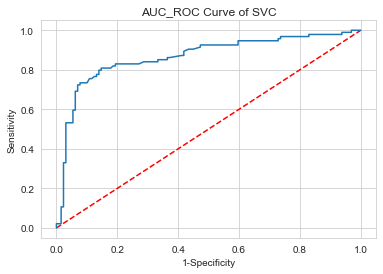

In [150]:
import matplotlib.pyplot as plt
svc = SVC(C = 1.3, gamma = 'scale', kernel = 'rbf')
svc.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test,y_pred)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('AUC_ROC Curve of SVC')
plt.show

Around 0.83 of curve is covered under AUC_ROC

## Saving the Best model

In [161]:
import pickle
model = SVC(C = 1.3, gamma = 'scale', kernel = 'rbf')
model.fit(x1,y)
save_file = 'SVC_Practiceproject_5.pkl'
pickle.dump(model, open(save_file,'wb'))

load_file = pickle.load(open(save_file,'rb'))
y_pred = load_file.predict(X_test)
print(cross_val_score(model,x1,y))
print(np.mean(cross_val_score(model,x1,y)))

[0.83798883 0.8258427  0.81460674 0.79775281 0.87640449]
0.8305191136777352
